Problem Description
Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need
to figure out the accuracy of your model and use that to predict different samples in your test
dataset. In iris dataset there are 150 samples containing following features,
1. Sepal Length
2. Sepal Width
3. Petal length
4. Petal width
Using above 4 features you will classify a flower in one of the three categories,
1. Setosa
2. Versicolour
3. Virginica
Download the iris dataset directly from sklearn.dataset

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
print(dir(iris))
print(iris.feature_names)
print(iris.target_names)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Category'] = iris.target
#df['Category'] = df['Category'].replace({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
101,5.8,2.7,5.1,1.9,2
69,5.6,2.5,3.9,1.1,1
96,5.7,2.9,4.2,1.3,1


# Create and train logistic regression model

In [5]:
model = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(df[iris.feature_names],df["Category"], test_size=0.2)
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
59,5.2,2.7,3.9,1.4
3,4.6,3.1,1.5,0.2
119,6.0,2.2,5.0,1.5
117,7.7,3.8,6.7,2.2
128,6.4,2.8,5.6,2.1
67,5.8,2.7,4.1,1.0
60,5.0,2.0,3.5,1.0
137,6.4,3.1,5.5,1.8
8,4.4,2.9,1.4,0.2
141,6.9,3.1,5.1,2.3


In [6]:
Y_test,len(Y_test)

(59     1
 3      0
 119    2
 117    2
 128    2
 67     1
 60     1
 137    2
 8      0
 141    2
 145    2
 103    2
 142    2
 22     0
 84     1
 104    2
 13     0
 113    2
 43     0
 28     0
 83     1
 54     1
 77     1
 107    2
 47     0
 109    2
 91     1
 65     1
 6      0
 112    2
 Name: Category, dtype: int32,
 30)

In [7]:
model.fit(X_train, Y_train)

C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Measure accuracy

In [8]:
model.score(X_test, Y_test)

0.9333333333333333

In [9]:
Pred = model.predict(X_test)

In [10]:
print(model.predict([X_test.iloc[5]]))
print(Y_test.iloc[5])

[1]
1


C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Confusion Matrix

In [11]:
cm = confusion_matrix(Y_test, Pred)
cm

array([[ 8,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

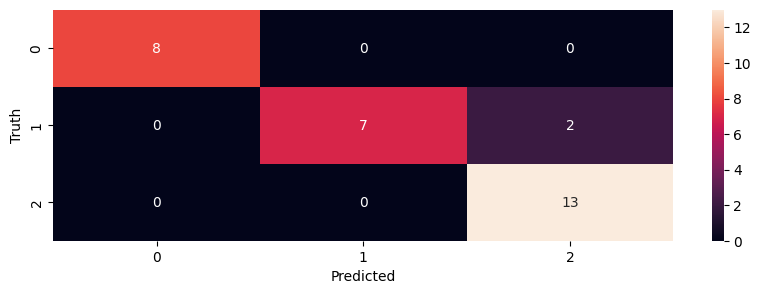

In [12]:
plt.figure(figsize = (10,3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')